In [1]:
import os   # needed for directory and file interaction
import pandas as pd
from __future__ import print_function
import matplotlib.pyplot as plt
import sys
import time
%matplotlib inline

In [2]:
def import_tube_data_file(file_to_open):
    if os.path.isfile(file_to_open):
        with open(file_to_open, 'r') as file:
            tube_type='5749'
            file_contents_string = str(file.read())
            file_contents_list = file_contents_string.split()
            x_values = ['x' + i for i in file_contents_list[8::2]]
            y_values = [i for i in file_contents_list[9::2]]
            data_dict = dict(zip(x_values, y_values))
            data_dict['anode_voltage'] = file_contents_list[6]
            data_dict['tube_ID'] = os.path.basename(file_to_open)[:-4]
            data_dict['tube_type'] = tube_type
        return pd.Series(data_dict, name = file_to_open)
    else:
        print('%s is not a file' % file_to_open)

In [4]:
chosen_folder = './SampleTubeData/'

list_of_tube_data_files_in_dir = []
for file_name in os.listdir(chosen_folder):
    if file_name.endswith(".utd"):
        list_of_tube_data_files_in_dir.append(chosen_folder + file_name)

print(list_of_tube_data_files_in_dir)
batch_list = list_of_tube_data_files_in_dir
tube_type = '5749'

['./SampleTubeData/1.utd', './SampleTubeData/10.utd', './SampleTubeData/11.utd', './SampleTubeData/12.utd', './SampleTubeData/13.utd', './SampleTubeData/14.utd', './SampleTubeData/15.utd', './SampleTubeData/16.utd', './SampleTubeData/17.utd', './SampleTubeData/18.utd', './SampleTubeData/19.utd', './SampleTubeData/2.utd', './SampleTubeData/20.utd', './SampleTubeData/21.utd', './SampleTubeData/22.utd', './SampleTubeData/23.utd', './SampleTubeData/24.utd', './SampleTubeData/25.utd', './SampleTubeData/26.utd', './SampleTubeData/27.utd', './SampleTubeData/28.utd', './SampleTubeData/29.utd', './SampleTubeData/3.utd', './SampleTubeData/30.utd', './SampleTubeData/31.utd', './SampleTubeData/32.utd', './SampleTubeData/33.utd', './SampleTubeData/34.utd', './SampleTubeData/35.utd', './SampleTubeData/36.utd', './SampleTubeData/37.utd', './SampleTubeData/38.utd', './SampleTubeData/39.utd', './SampleTubeData/4.utd', './SampleTubeData/40.utd', './SampleTubeData/42.utd', './SampleTubeData/43.utd', './S

In [5]:
#  master_tube_dict is a dictionary for storing all the Tube objects
master_tube_dict = {}

# Prompt the user to choose a folder, then make a list of all the files in the chosen directory to be processed
# batch_list = choose_folder()

# tube_type = ask_tube_type('', confirm=0)
df = pd.DataFrame()
# Read and process every file in the batch_list, then add each resulting Tube object to the master_tube_dict
for tube in batch_list:
    tube_series = import_tube_data_file(tube)
    df = df.append(tube_series, ignore_index=True)

# Print the number of tube objects that were created
print(len(df), "tubes were processed and added to the Master Tube Dictionary.")

49 tubes were processed and added to the Master Tube Dictionary.


In [6]:
df = df[['tube_ID',
    'anode_voltage', 
    'tube_type',
    'x-50',
    'x-46',
    'x-42',
    'x-38',
    'x-34',
    'x-30',
    'x-26',
    'x-22',
    'x-18',
    'x-14',
    'x-10',
    'x-6',
    'x-2']].copy()

In [7]:
columns = list(df.columns.values[3:])

In [8]:
def plot_matched(tubes_df, match_list):
    for i in match_list:
        temp = tubes_df[tubes_df.tube_ID == str(i)].copy()
        plt.plot(temp[3:16])
    plt.show()

In [9]:
def plot_all(tubes_df):
    for row in tubes_df.itertuples():
        plt.plot(row[4:])
    plt.show()

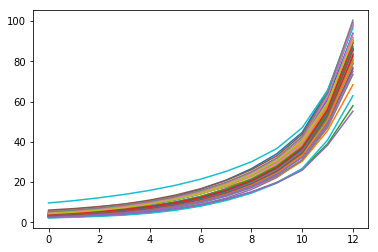

In [10]:
plot_all(df)

In [16]:
# Ask the user to enter the tube ID for the tube they want matched.
user_choice = input("Please enter the Tube ID of the tube to be matched:")
n_matches = input("How many matched tubes would you like?")


Please enter the Tube ID of the tube to be matched:2
How many matched tubes would you like?3


In [19]:
tubes_df.columns

Index([u'tube_ID', u'anode_voltage', u'tube_type', u'x-50', u'x-46', u'x-42',
       u'x-38', u'x-34', u'x-30', u'x-26', u'x-22', u'x-18', u'x-14', u'x-10',
       u'x-6', u'x-2', u'x-50_diff^2', u'x-46_diff^2', u'x-42_diff^2',
       u'x-38_diff^2', u'x-34_diff^2', u'x-30_diff^2', u'x-26_diff^2',
       u'x-22_diff^2', u'x-18_diff^2', u'x-14_diff^2', u'x-10_diff^2',
       u'x-6_diff^2', u'x-2_diff^2'],
      dtype='object')




The 3 best matches to Tube ID #2 are:

['2', '9', '43', '45']


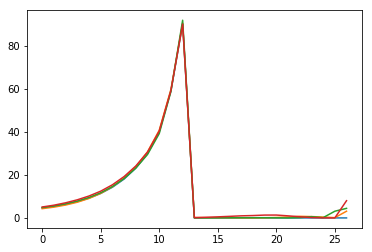

In [21]:
# def find_match(tubes_df):
tubes_df = df.copy()

bias_list = list(tubes_df)[3:]  # The list of bias voltage columns;  i.e. -50, -46, -42, -38, -etc.
bias_diff_list = []             # The list of new _diff^2 columns, to hold the difference values from tube_to_match

# For every bias voltage column in the DataFrame, add a new column with the suffix '_diff^2' after the name.
for i in bias_list:
    newcolumn = str(i + '_diff^2')
    tubes_df[newcolumn] = tubes_df[i]
    bias_diff_list.append(newcolumn)

tube_to_match = tubes_df[tubes_df.tube_ID == str(user_choice)]
# Compute the square of the difference of each current measurement for every tube, compared to the tube_to_match
# Put all the data into the appropriate _diff^2 column.
for i in range(len(bias_diff_list)):
    tubes_df[bias_diff_list[i]] = tubes_df[bias_diff_list[i]].apply(lambda x: abs(float(x) - float(tube_to_match[bias_diff_list[i]].values[0]))**2)


# Add a column called squares_sum and compute the sum of all the diff squares on each row
tubes_df['squares_sum'] = tubes_df[bias_diff_list].sum(axis=1)

# Sort ascending by squares_sum.
tubes_df_sorted = tubes_df.sort_values('squares_sum')

# Print the results
print("\n\n\nThe %s best matches to Tube ID #%s are:\n" % (n_matches, user_choice))
match_list_pdseries = tubes_df_sorted['tube_ID']
match_list = match_list_pdseries.tolist()
match_list = match_list[0:(int(n_matches)+1)]
print(match_list)

temp = pd.DataFrame()
for i in match_list:
    temp = temp.append(tubes_df[tubes_df.tube_ID == i].copy(), )

plot_all(temp)
    
# Ask the user if they'd like to see a plot of the results
# plot_results = input("\nWould you like to see a plot of the results? y/n")
# if plot_results == 'y' or 'Y':
# plot_matched(tubes_df, match_list)
# else:
#     print("\n\n\nWell alright then.")
#     time.sleep(3)
#     print("\n"*20)